# GAN Debugging Notebook

This notebook is provided to help you debug your code. We provide you with small discriminator and generator networks that you can train on the MNIST dataset. This small GAN can be trained quickly on MNIST and will help you verify that your loss functions and training code is correct.

In [19]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount("/content/gdrive",force_remount=True)

Mounted at /content/gdrive


In [20]:
import os 
os.chdir("/content/gdrive/MyDrive/assignment4_materials/")

In [21]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from gan.train import train
from gan.utils import sample_noise, show_images, deprocess_img, preprocess_img
from gan.losses import discriminator_loss, generator_loss, ls_discriminator_loss, ls_generator_loss

In [23]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## MNIST Dataset


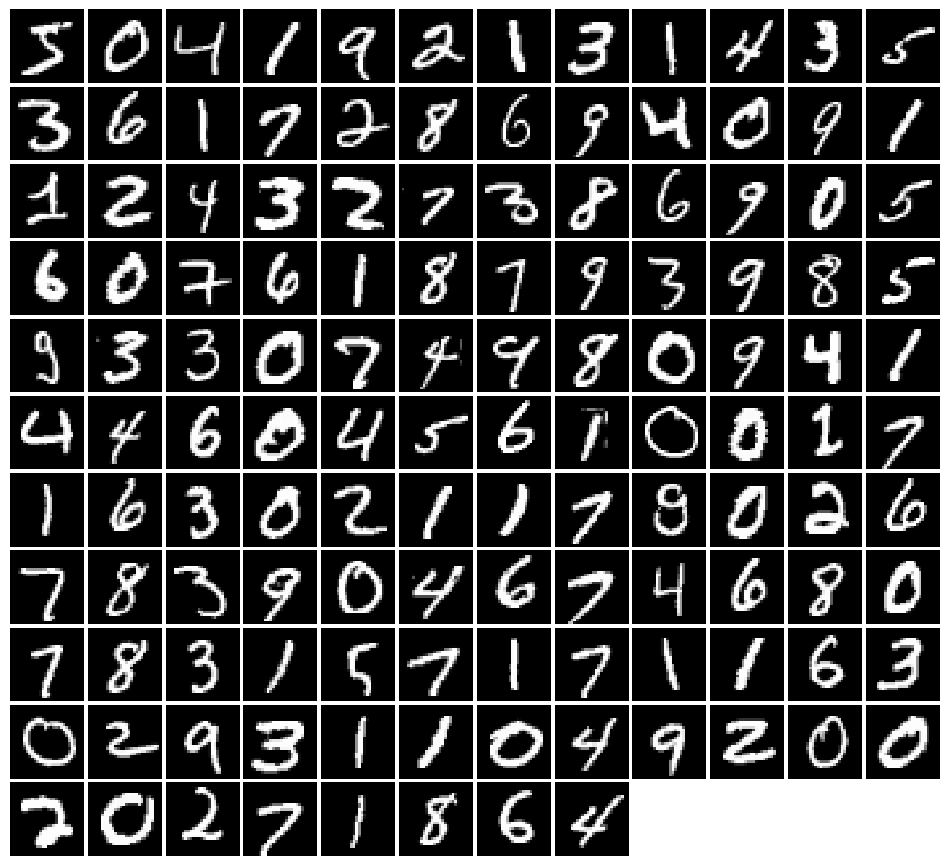

In [24]:
NOISE_DIM = 100
batch_size = 128

mnist = datasets.MNIST('./MNIST_data', train=True, download=True,
                           transform=transforms.ToTensor())
loader_train = DataLoader(mnist, batch_size=batch_size, drop_last=True)


imgs = next(loader_train.__iter__())[0].view(batch_size, 784).numpy().squeeze() #loader_train.__iter__().next()[0].view(batch_size, 784).numpy().squeeze()
show_images(imgs)

# Discriminator and Generator


In [25]:
class Flatten(nn.Module):
    def forward(self, x):
        #print(x.shape)
        #N, C, H, W = x.size() # read in N, C, H, W
        return x.view(x.shape[0], -1)  # "flatten" the C * H * W values into a single vector per image


In [26]:
def discriminator():
    """
    Initialize and return a simple discriminator model.
    """
    model = torch.nn.Sequential( Flatten(),
                                torch.nn.Linear(784, 256), 
                                torch.nn.LeakyReLU(),
                                torch.nn.Linear(256, 256), 
                                torch.nn.LeakyReLU(),
                                torch.nn.Linear(256, 1)
    )
    return model

In [27]:
def generator(noise_dim=NOISE_DIM):
    """
    Initialize and return a simple generator model.
    """
    
    model = nn.Sequential(
        Flatten(),
        torch.nn.Linear(noise_dim, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 784),
        torch.nn.Tanh()
    )

    return model

Test to make sure the number of parameters in the generator is correct:

# Train

The simple model provided will train on MNIST in only a few minutes. You should expect results that resemble the following if your loss function and training loop implementations are correct:

<img src="gan_samples/mnist.jpg" width=500>

EPOCH:  1
Iter: 0, D: 0.6632, G:0.7255


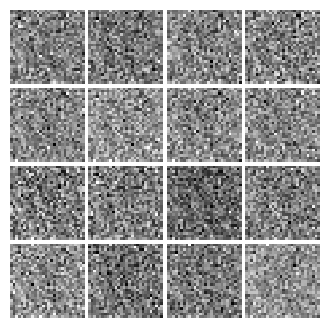


Iter: 250, D: 0.6523, G:1.218


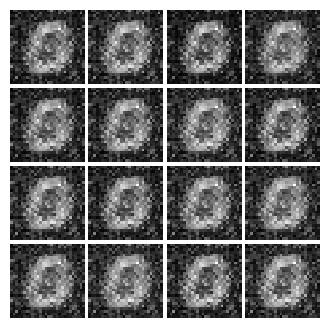


EPOCH:  2
Iter: 500, D: 0.3751, G:1.334


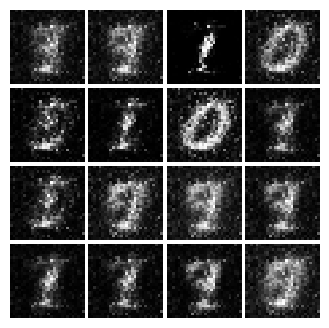


Iter: 750, D: 0.5195, G:0.8959


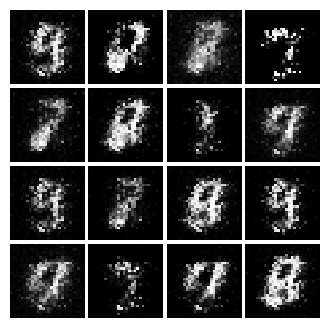


EPOCH:  3
Iter: 1000, D: 0.467, G:1.722


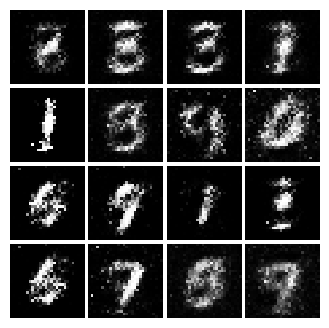


Iter: 1250, D: 0.5017, G:1.378


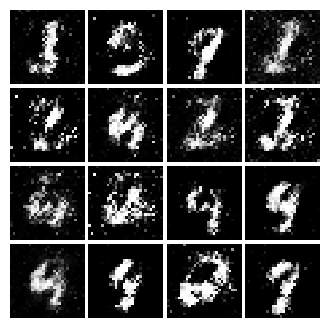


EPOCH:  4
Iter: 1500, D: 0.5831, G:1.069


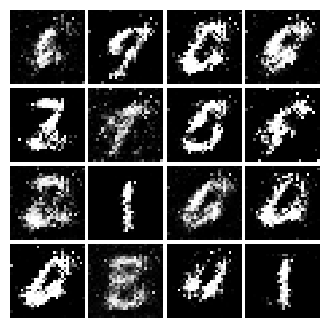


Iter: 1750, D: 0.5811, G:1.017


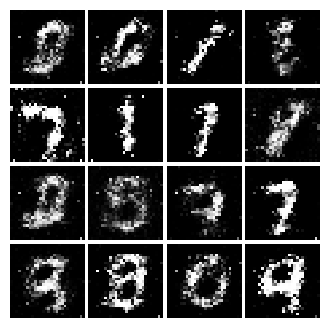


EPOCH:  5
Iter: 2000, D: 0.6385, G:0.7514


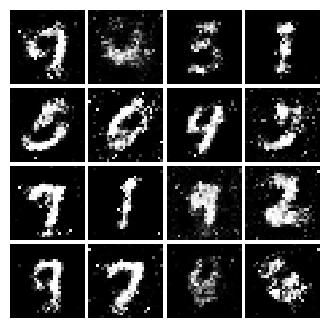


Iter: 2250, D: 0.6345, G:0.9456


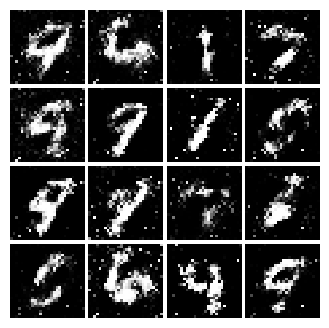


EPOCH:  6
Iter: 2500, D: 0.6589, G:0.9116


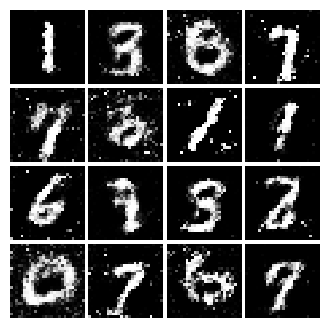


Iter: 2750, D: 0.6971, G:0.8735


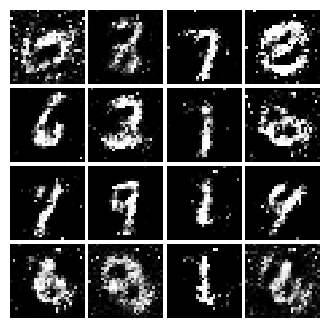


EPOCH:  7
Iter: 3000, D: 0.6435, G:0.8274


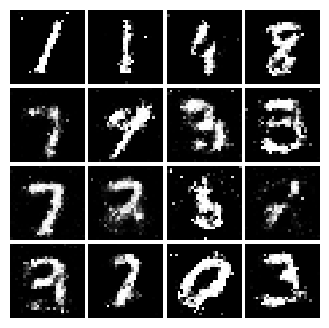


Iter: 3250, D: 0.6186, G:0.8112


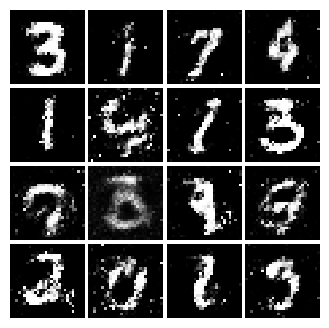


EPOCH:  8
Iter: 3500, D: 0.6491, G:0.8476


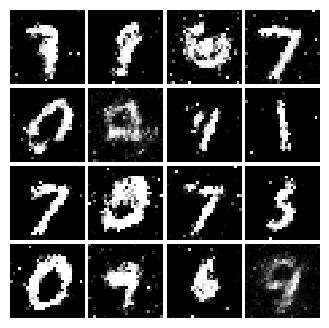


EPOCH:  9
Iter: 3750, D: 0.6364, G:0.7904


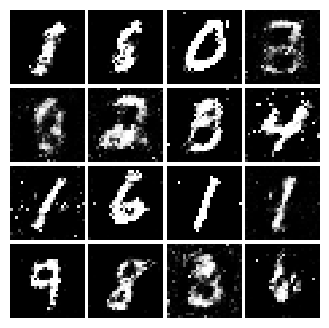


Iter: 4000, D: 0.7122, G:0.7916


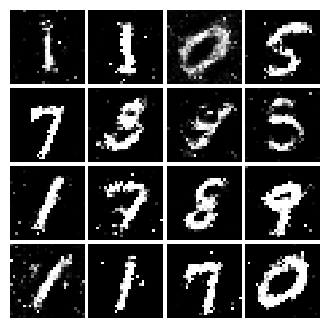


EPOCH:  10
Iter: 4250, D: 0.6272, G:0.8375


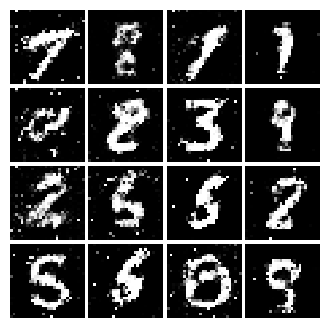


Iter: 4500, D: 0.65, G:0.7434


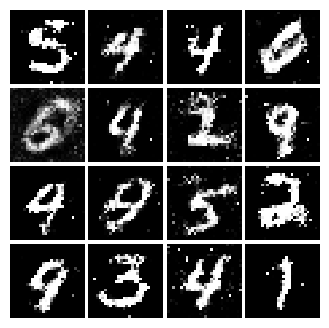

In [28]:
# original GAN
D = discriminator().to(device)
G = generator().to(device)

D_optimizer = torch.optim.Adam(D.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_optimizer = torch.optim.Adam(G.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D, G, D_optimizer, G_optimizer, discriminator_loss, generator_loss, train_loader=loader_train, num_epochs=10, device=device)

EPOCH:  1
Iter: 0, D: 0.3805, G:0.4103


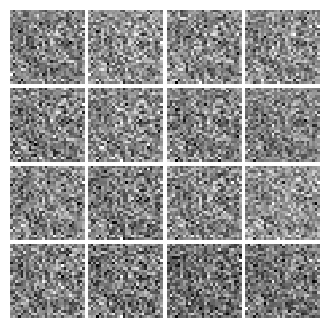


Iter: 250, D: 0.2892, G:0.2648


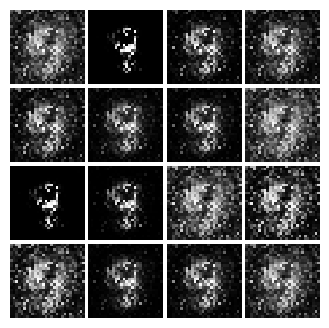


EPOCH:  2
Iter: 500, D: 0.2336, G:0.02312


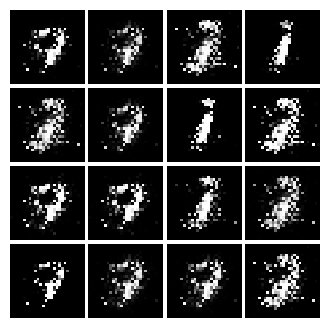


Iter: 750, D: 0.1238, G:0.4017


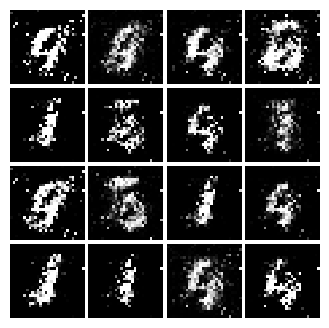


EPOCH:  3
Iter: 1000, D: 0.1388, G:0.2856


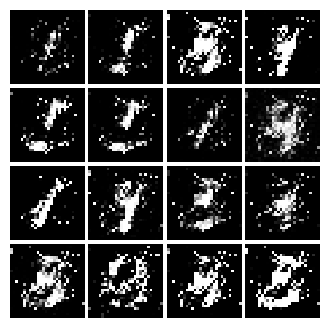


Iter: 1250, D: 0.1644, G:0.2095


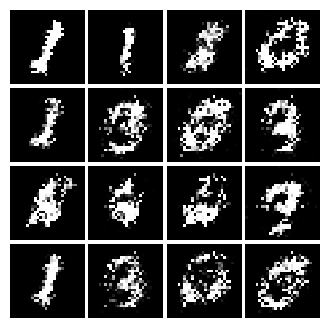


EPOCH:  4
Iter: 1500, D: 0.15, G:0.2473


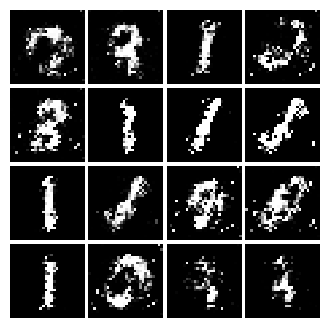


Iter: 1750, D: 0.1815, G:0.2463


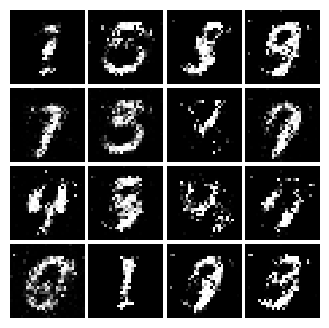


EPOCH:  5
Iter: 2000, D: 0.1951, G:0.1983


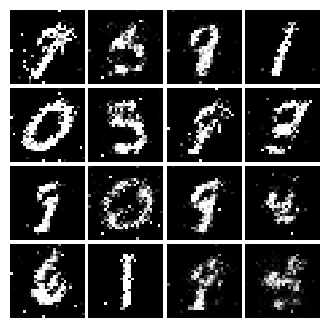


Iter: 2250, D: 0.2001, G:0.1794


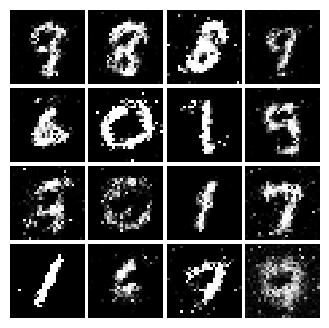


EPOCH:  6
Iter: 2500, D: 0.206, G:0.2107


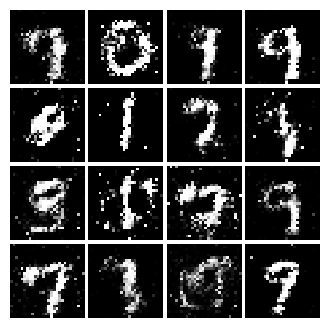


Iter: 2750, D: 0.2285, G:0.1876


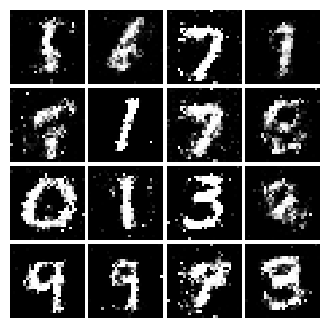


EPOCH:  7
Iter: 3000, D: 0.2037, G:0.1946


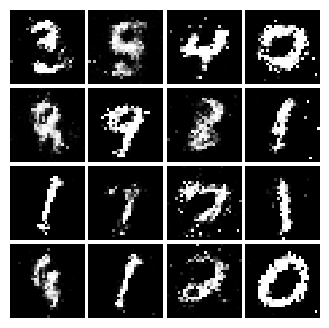


Iter: 3250, D: 0.2037, G:0.2381


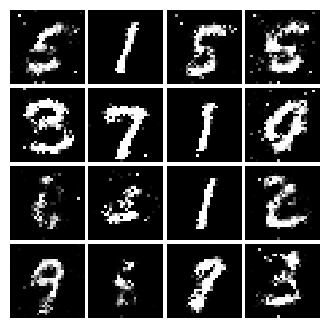


EPOCH:  8
Iter: 3500, D: 0.2325, G:0.1569


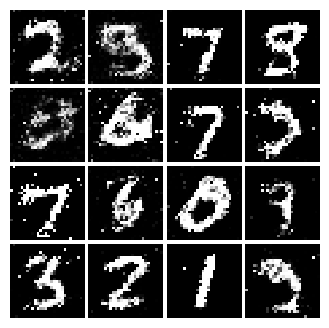


EPOCH:  9
Iter: 3750, D: 0.2084, G:0.1882


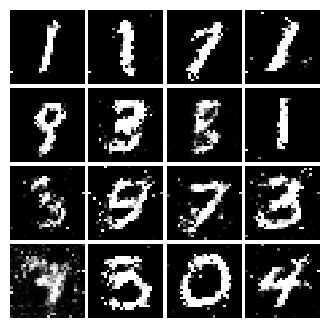


Iter: 4000, D: 0.2241, G:0.1662


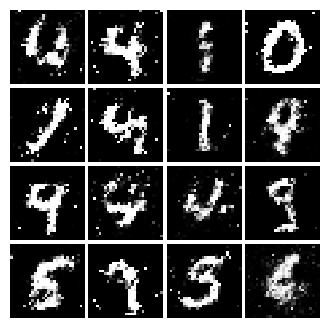


EPOCH:  10
Iter: 4250, D: 0.2047, G:0.2019


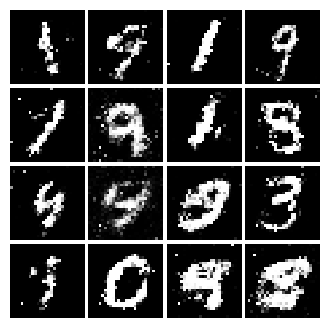


Iter: 4500, D: 0.2305, G:0.1599


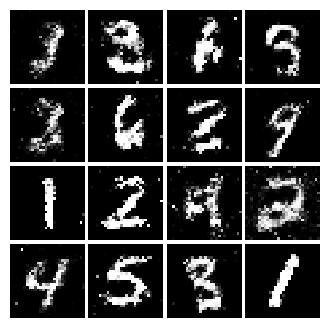

In [29]:
# LSGAN
D_LS = discriminator().to(device)
G_LS = generator().to(device)

D_LS_optimizer = torch.optim.Adam(D_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_LS_optimizer = torch.optim.Adam(G_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D_LS, G_LS, D_LS_optimizer, G_LS_optimizer, ls_discriminator_loss, ls_generator_loss, train_loader=loader_train, num_epochs=10, device=device)